# SETUP

In [20]:
# IMPORT MODULES

import numpy as np
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import ticker, cm
from matplotlib.pyplot import figure
import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from imblearn.over_sampling import SMOTE, ADASYN

import pickle
import os

from sklearn.model_selection import train_test_split
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [21]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
print(df.columns)
df.head()

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# DATA EXPLORATION

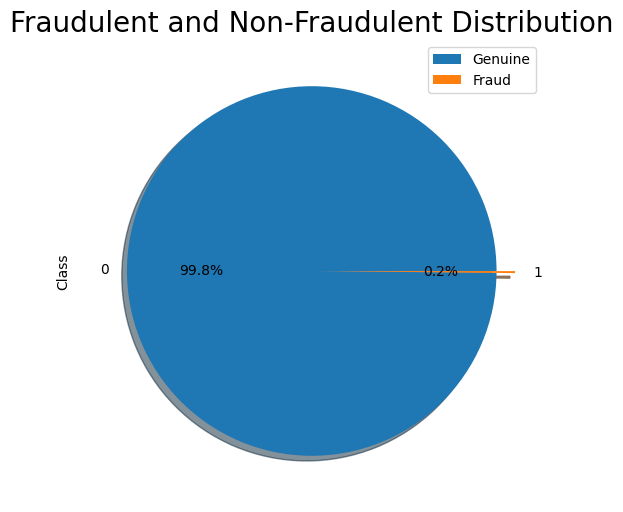

In [22]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine","Fraud"])
plt.show()

In [23]:
# Dealing with missing data
df.isnull().sum().max()

0

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_9089/261402244.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_9089/261402244.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

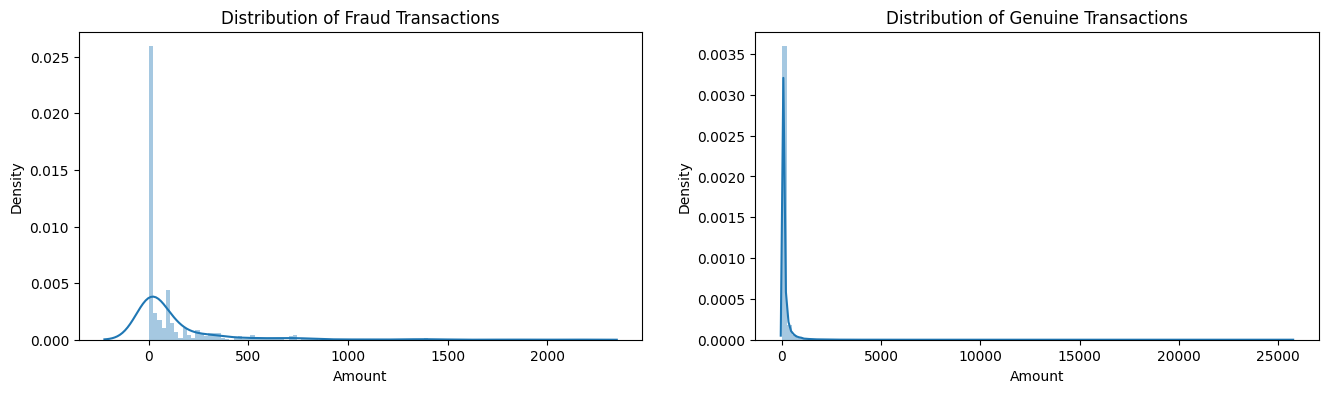

In [24]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_9089/1670609457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=100)


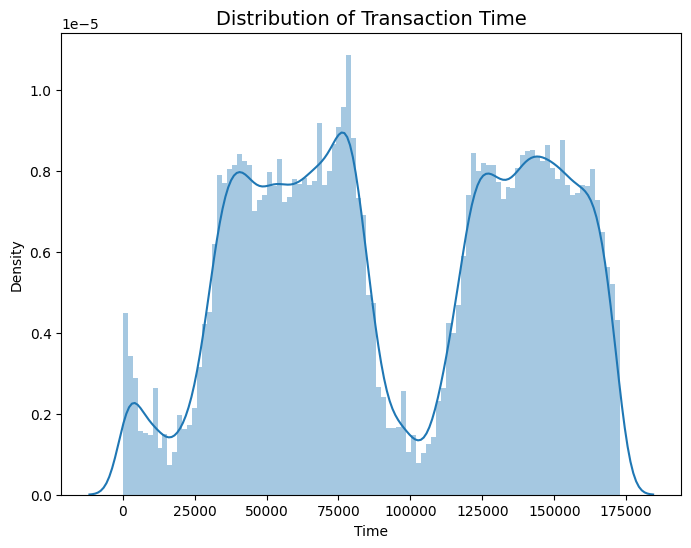

In [25]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_9089/2292270322.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_9089/2292270322.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

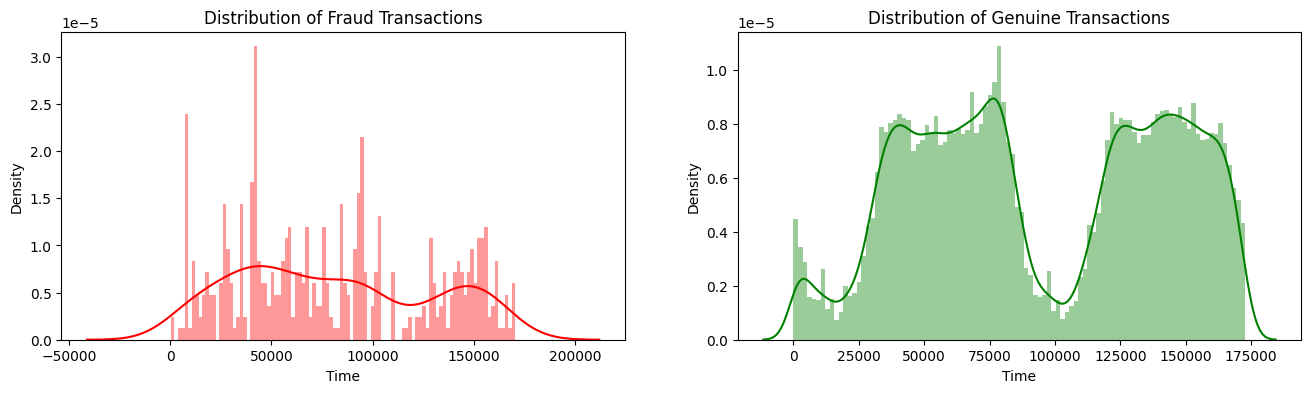

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

# DATA ENGINEERING

In [27]:
df.reset_index(inplace = True , drop = True)

In [28]:
# Scale amount by log
df['Amount_log'] = np.log(df.Amount +0.01)

Text(0.5, 1.0, 'Class vs Log Amount')

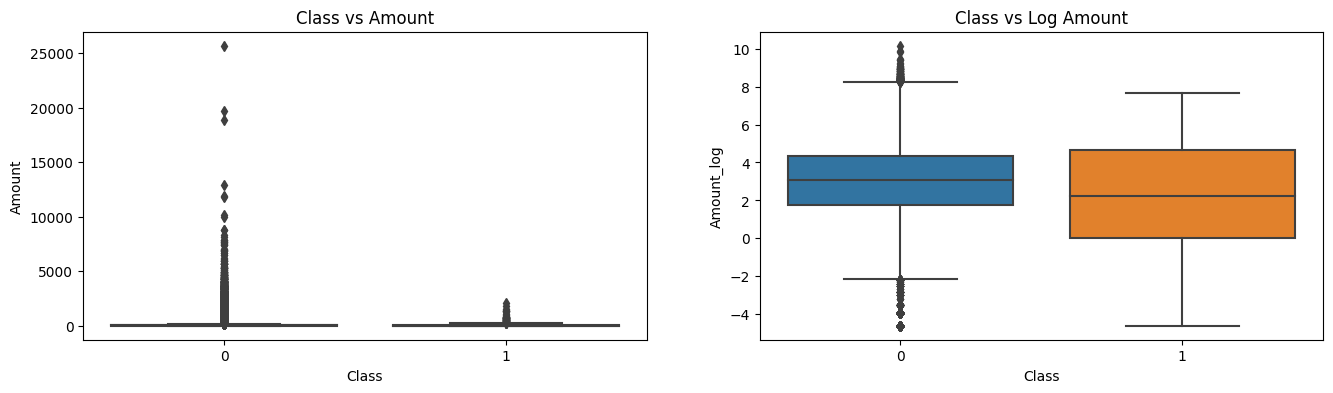

In [29]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="Amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

In [30]:
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: /Users/olivier_ld/Desktop/Becode-cloud/Projects/Tableau


# LOAD & PREPARE THE DATA

In [31]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248495


In [32]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['Time','Class','Amount'],axis=1)
y = df['Class']
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.248461
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210844
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217889
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.303585


# BUILD MODELS

## XGBOOST CLASSIFIER

In [77]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7)
X_test, X_cv, y_test, y_cv = train_test_split(X_test,y_test, test_size = 0.50, train_size =0.50)
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_validation - ",X_cv.shape)
print("y_validation - ",y_cv.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (159491, 29)
y_train -  (159491,)
X_validation -  (34177, 29)
y_validation -  (34177,)
X_test -  (34177, 29)
y_test -  (34177,)


In [78]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn import metrics
import xgboost as xgb
#X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0) 

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_cv)

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train) 

# y_pred = logreg.predict(X_test)

# https://en.wikipedia.org/wiki/Precision_and_recall
print(metrics.classification_report(y_cv, y_pred))

conf_mx = metrics.confusion_matrix(y_cv,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34115
           1       0.98      0.76      0.85        62

    accuracy                           1.00     34177
   macro avg       0.99      0.88      0.93     34177
weighted avg       1.00      1.00      1.00     34177

TN:  34114
FP:  1
FN:  15
TP:  47
recall =  0.758 precision =  0.979
F1 =  0.855


In [79]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

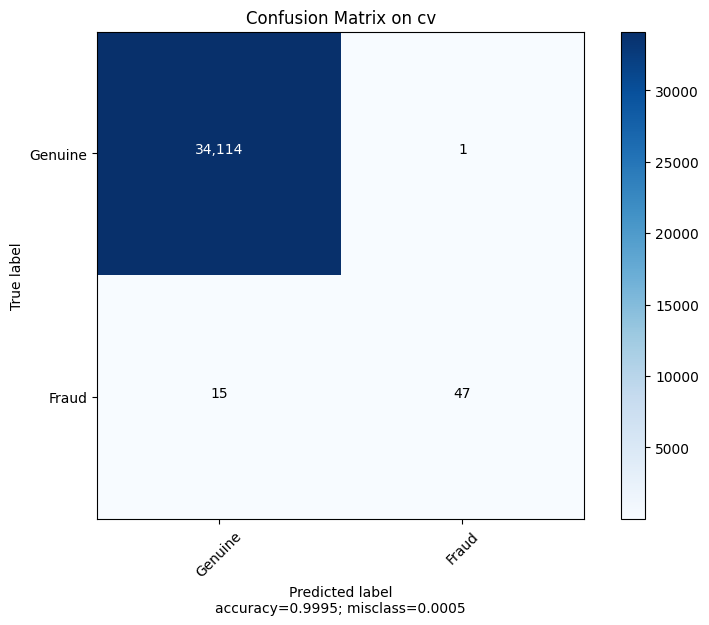

In [80]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on cv")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34121
           1       0.94      0.82      0.88        56

    accuracy                           1.00     34177
   macro avg       0.97      0.91      0.94     34177
weighted avg       1.00      1.00      1.00     34177



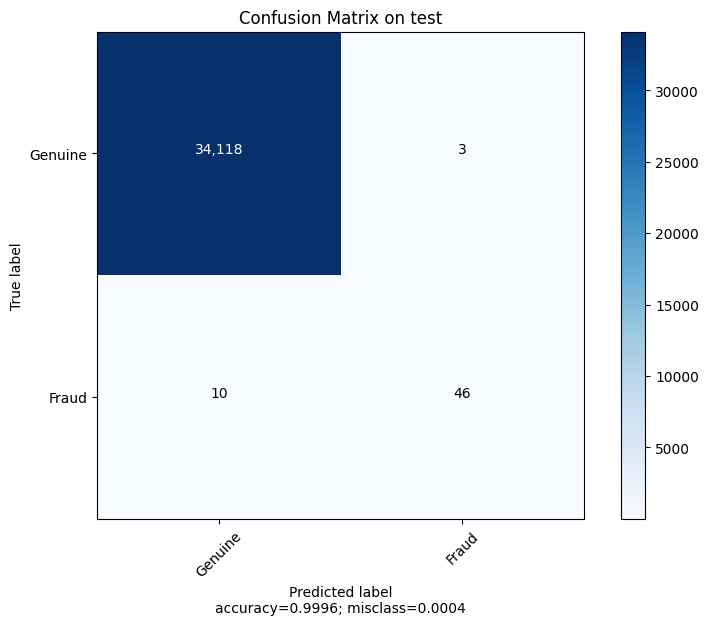

TN:  34118
FP:  3
FN:  10
TP:  46
recall =  0.821 precision =  0.939
F1 =  0.876


In [81]:
#check with Test set : results

y_pred_test = xgb_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))

conf_mx2 = metrics.confusion_matrix(y_test,y_pred_test)

plot_confusion_matrix(conf_mx2, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

TN = conf_mx2[0,0]
FP = conf_mx2[0,1]
FN = conf_mx2[1,0]
TP = conf_mx2[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

## ADASYN OVERSAMPLING

In [82]:
from imblearn.over_sampling import RandomOverSampler

In [83]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7)
X_test, X_cv, y_test, y_cv = train_test_split(X_test,y_test, test_size = 0.50, train_size =0.50)
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_validation - ",X_cv.shape)
print("y_validation - ",y_cv.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (159491, 29)
y_train -  (159491,)
X_validation -  (34177, 29)
y_validation -  (34177,)
X_test -  (34177, 29)
y_test -  (34177,)


In [84]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_cv - ",X_test.shape)
print("y_cv - ",y_test.shape)

Original dataset shape Counter({0: 159229, 1: 262})
Resampled dataset shape Counter({0: 159229, 1: 159204})
X_train -  (318433, 29)
y_train -  (318433,)
X_cv -  (34177, 29)
y_cv -  (34177,)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34115
           1       0.86      0.89      0.87        62

    accuracy                           1.00     34177
   macro avg       0.93      0.94      0.94     34177
weighted avg       1.00      1.00      1.00     34177



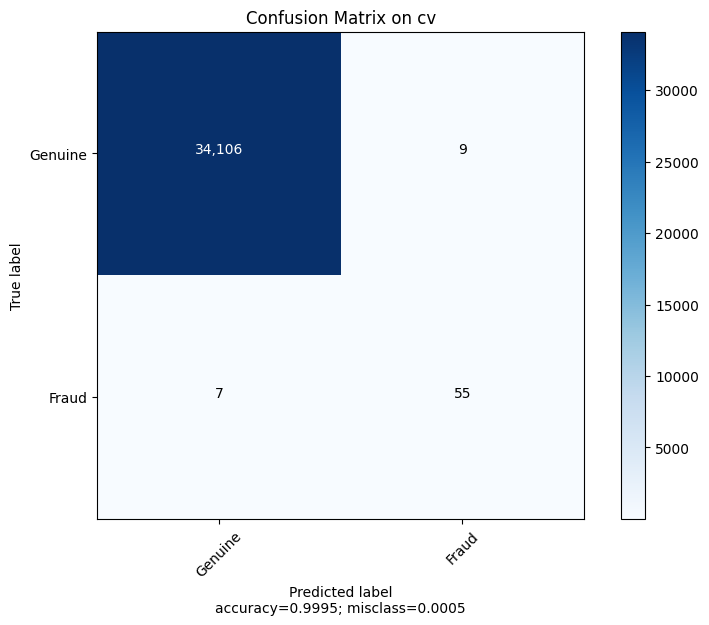

TN:  34106
FP:  9
FN:  7
TP:  55
recall =  0.887 precision =  0.859
F1 =  0.873


In [85]:
#  ADASYN Sampling with Logistic Regression

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_ADA = xgb_model.predict(X_cv)

#check with Validation set : results

print(metrics.classification_report(y_cv, y_pred_ADA))

conf_mxADA = metrics.confusion_matrix(y_cv,y_pred_ADA)

plot_confusion_matrix(conf_mxADA, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on cv")

TN = conf_mxADA[0,0]
FP = conf_mxADA[0,1]
FN = conf_mxADA[1,0]
TP = conf_mxADA[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34116
           1       0.80      0.87      0.83        61

    accuracy                           1.00     34177
   macro avg       0.90      0.93      0.92     34177
weighted avg       1.00      1.00      1.00     34177



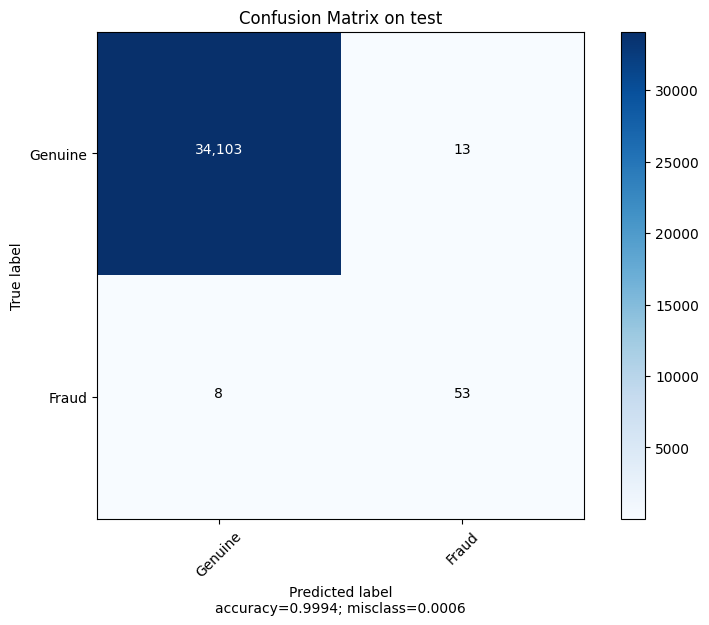

TN:  34103
FP:  13
FN:  8
TP:  53
recall =  0.869 precision =  0.803
F1 =  0.835


In [86]:
y_pred_ADA_test = xgb_model.predict(X_test)

#check with Validation set : results

print(metrics.classification_report(y_test, y_pred_ADA_test))

conf_mxADA2 = metrics.confusion_matrix(y_test, y_pred_ADA_test)

plot_confusion_matrix(conf_mxADA2, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

TN = conf_mxADA2[0,0]
FP = conf_mxADA2[0,1]
FN = conf_mxADA2[1,0]
TP = conf_mxADA2[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))